## 1. 

#### Import the retail_shop_data file and view the first 5 rows. Write another code to check how many rows and columns are in the Data Frame. Are there any duplicates.

In [1]:
import pandas as pd

df = pd.read_csv("retail_shop_data.csv")
df.head()

,Date,Customer ID,Product ID,Product Name,Cost,Price,Quantity,Total
0,1 01 2023,1001,101,T-Shirt,18,20,2,40
1,1 01 2023,1002,102,Jeans,35,50,1,50
2,2 01 2023,1003,103,Hoodie,25,30,3,90
3,3 01 2023,1004,104,Sneakers,55,70,2,140
4,3 01 2023,1005,105,Sunglasses,17,25,1,25


In [2]:
# Checking the number of rows in the dataset
df.shape[0]

21

In [3]:
# Checking number of columns:
df.shape[1]

8

In [4]:
# Checking for duplicates
df.duplicated('Product Name').sum()

1

## 2.

#### Write another code to rename columns: "Total" to "Total Revenue", "Price" to "Price Per Product" and "Cost" to "Cost Per Product".

In [5]:
df.rename(columns={'Total':'Revenue','Cost': 'Cost Per Product', 
                   'Price': 'Price Per Product'}, inplace=True)
df.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue
0,1 01 2023,1001,101,T-Shirt,18,20,2,40
1,1 01 2023,1002,102,Jeans,35,50,1,50
2,2 01 2023,1003,103,Hoodie,25,30,3,90
3,3 01 2023,1004,104,Sneakers,55,70,2,140
4,3 01 2023,1005,105,Sunglasses,17,25,1,25


## 3

#### Calculate the total cost per product and add this as a column to the DataFrame. Name this column: Total Costs. Calculate the difference between Revenue and Expenses. Name this column, Profit.

In [6]:
# Adding the total costs column to the DataFrame
df["Costs"] = df["Cost Per Product"] * df["Quantity"]

# Adding the profit column
df['Profit'] = df['Revenue'] - df['Costs']
df.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8


## 4. 

#### Add another column called Filter, this column should check for products that have profit margin of $15 and above. If a product has profit over 15 it should return True, otherwise False.

In [7]:
df['Filter'] = df["Profit"] > 15
df.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4,False
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15,False
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15,False
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8,False


## 5. 

#### Which products have profit margin of over $15? Use pandas.

In [8]:
# Using filter to filter True values from DataFrame
df.query("Filter == True")

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
7,6 01 2023,1008,108,Jacket,63,80,1,80,63,17,True
13,9 01 2023,1008,108,Jacket,63,80,2,160,126,34,True


Another method

In [9]:
print(df[df['Filter'] == True]['Product Name'])

3     Sneakers
7       Jacket
13      Jacket
Name: Product Name, dtype: object


# DAY 26

## 1. 

#### Using pandas, write a code to check the difference in profit between Jackets and Sneakers.

In [10]:
# Group data by products and sum profit
df_data = df.groupby("Product Name")["Profit"].sum()

jackets_sneakers_profit = abs(df_data.loc["Jacket"] - df_data.loc["Sneakers"])
print(f'The profit difference between Jackets and Sneakers {jackets_sneakers_profit}')

The profit difference between Jackets and Sneakers 21


## 2. 
#### Using pandas, what is the difference in costs between the most profitable product and the least profitable product.

In [11]:
# Sort DataFrame by profit
df.sort_values("Profit", inplace=True)
cost_diff = df.iloc[-1]["Costs"] - df.iloc[0]["Costs"]

print('The difference in costs between the most profitable', 
      'product and least profitable is', cost_diff)

The difference in costs between the most profitable product and least profitable is 98


## 3. 

#### Write a code to access the total costs of jackets (using loc method).

In [12]:
# Group data by Product Name and sum costs
df_data = df.groupby("Product Name")["Costs"].sum()

# Use loc to find the product costs
df_costs_of_jeans = df_data.loc["Jacket"]

print("The costs of Jackets is", df_costs_of_jeans)

The costs of Jackets is 189


## 4. 
#### Using Matplotlib, create a bar stack graph of the sales, costs and profits of the 5 least profitable products.

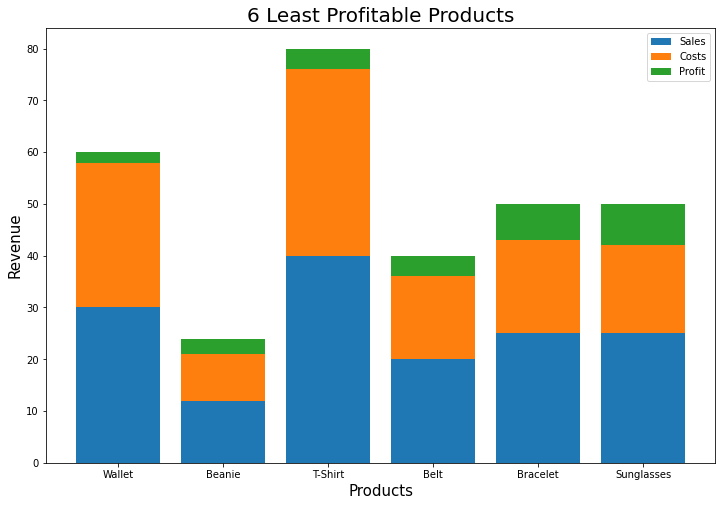

In [13]:
import matplotlib.pyplot as plt

df_least_5_products = df.sort_values(by = "Profit", ascending=True)[0:6]

# Create data
products = df_least_5_products["Product Name"]
sales = df_least_5_products["Revenue"]
costs = df_least_5_products["Costs"]
profit = df_least_5_products["Profit"]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
ax.bar(products, sales,  label="Sales")
ax.bar(products, costs,  label="Costs", bottom = sales)
ax.bar(products, profit, label="Profit", bottom = sales + costs)

ax.set_ylabel("Revenue", fontsize = 15)
ax.set_xlabel("Products", fontsize = 15)
plt.xticks(rotation = 0)
ax.legend()
plt.title("6 Least Profitable Products", fontsize = 20)
plt.show()

# Day 27

## 1. 

#### Using loc method , calculate the profit of the sunglasses.

In [14]:
# Find the batteries sales value
sales_sunglasses = df.loc[df["Product Name"]=="Sunglasses","Revenue"]
# Find the batteries costs values
costs_sunglasses = df.loc[df["Product Name"]=="Sunglasses","Costs"]

# Calculate the difference to find profit.
profit_of_sunglasses =  sales_sunglasses - costs_sunglasses
print(f"Profit on Sunglasses is {profit_of_sunglasses.iloc[0]} dollars")

Profit on Sunglasses is 8 dollars


## 2. 

#### Use loc to return the profit of hoodies.

In [15]:
# Locating the profit of hoodies
profit_hoodies = df.loc[df["Product Name"] == "Hoodie", "Profit"]
print("The profit of hoodies is:", profit_hoodies.iloc[0])

The profit of hoodies is: 15


## 3.

#### Using iloc return the names of the two least profitable products.

In [16]:
# Sort products by profit in ascending order
df.sort_values("Profit", inplace=True)

# Use iloc to find 2 least profitable products.
least_profitable_products = df.iloc[:2,3]
least_profitable_products

16    Wallet
12    Beanie
Name: Product Name, dtype: object

## 4. 
#### Using loc return the name of most profitable product.

In [17]:
df_most_profit = df.loc[df["Profit"]==max(df["Profit"])]
df_most_profit

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
13,9 01 2023,1008,108,Jacket,63,80,2,160,126,34,True


## 5. 
#### Using seaborn, create a scatter plot to visualize the relationship between the sales and costs for each product. Is there any noticeable correlation?

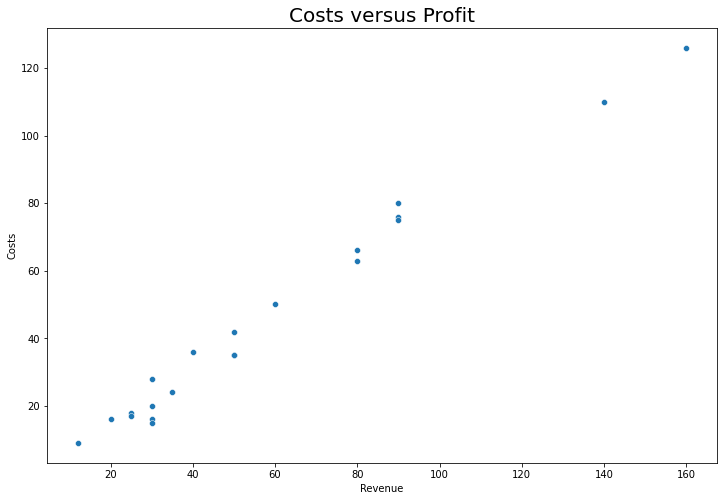

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df["Revenue"], y=df["Costs"], data=df)
plt.title('Costs versus Profit', fontsize=20)
plt.show()

In [21]:
import csv
import random

# List of names
names = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Henry", "Ivy", "Jack",
         "Kate", "Liam", "Mia", "Noah", "Olivia", "Peter", "Quinn", "Rachel", "Samuel", "Tara",
         "Uma", "Victor", "Wendy", "Xander", "Yara", "Zara", "Alex", "Beth", "Chris", "Diana"]


# Generate random data for distance run and time run
data = []
for _ in range(30):
    name = random.choice(names)
    distance = round(random.uniform(1, 10), 2)  # Random distance between 1 and 10
    time = round(random.uniform(1, 5), 2)      # Random time between 1 and 5 hours
    data.append([name, distance, time])

# Write the data to a CSV file
with open('running_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Name", "Distance (km)", "Time (hours)"])  # Write header
    writer.writerows(data)  # Write data rows

print("CSV dataset generated successfully.")

CSV dataset generated successfully.


In [22]:
df = pd.read_csv("running_data.csv")
df

,Name,Distance (km),Time (hours)
0,Wendy,3.10,4.24
1,Yara,8.61,4.16
2,Grace,7.17,2.94
3,Grace,1.36,2.78
4,David,3.96,3.46
5,Noah,4.95,3.51
6,Quinn,3.35,4.29
7,Uma,4.12,3.15
8,Wendy,2.74,4.08
9,Xander,9.36,2.71


In [23]:
import csv
import random

# List of names from the previous dataset
names = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Henry", "Ivy", "Jack",
         "Kate", "Liam", "Mia", "Noah", "Olivia", "Peter", "Quinn", "Rachel", "Samuel", "Tara",
         "Uma", "Victor", "Wendy", "Xander", "Yara", "Zara", "Alex", "Beth", "Chris", "Diana"]

# Select 10 random runners for rest times
rest_data = []
for _ in range(10):
    name = random.choice(names)
    rest_time = round(random.uniform(0.5, 3), 2)  # Random rest time between 0.5 and 3 hours
    rest_data.append([name, rest_time])

# Write the rest data to a CSV file
with open('runner_rest.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Name", "Rest Time (hours)"])  # Write header
    writer.writerows(rest_data)  # Write data rows

print("Rest dataset generated successfully.")

Rest dataset generated successfully.


In [25]:
df2 = pd.read_csv("runner_rest.csv")
df2

,Name,Rest Time (hours)
0,Grace,2.73
1,Chris,1.91
2,Frank,0.58
3,Alice,2.47
4,Noah,1.62
5,Victor,1.95
6,Alice,1.91
7,Mia,2.98
8,Bob,2.01
9,Noah,1.33
